# Distributions in Machine Learning

- Uniform
- Normal (Gaussian)
- Log-Normal

#### Uniform Distribution

In [4]:
import numpy as np
import seaborn as sns

In [5]:
u = np.random.uniform(size=10000)

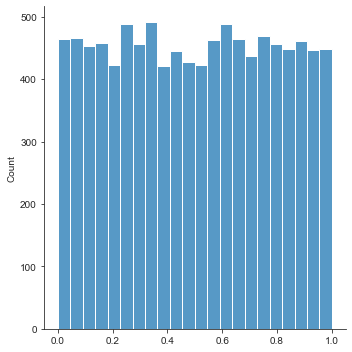

In [6]:
sns.set_style('ticks')
_ = sns.displot(u)

#### Real-world examples include:
- Dice rolling (PMF)
- Card drawing (PMF)
- Model hyperparameters
- Emission of radioactive particles
- Economic demand
- Analog-to-digital signal quantization errors

<hr>

#### Gaussian Distribution

Carl Friedrich Gauss (early 19th c. German mathematician and scientist) is the namesake of over a hundred concepts across mathematics, physics, and astronomy. One of those concepts is the Gaussian distribution, also known as the "bell curve" (though several distributions are bell-shaped) or <strong>normal distribution</strong>:

In [7]:
x = np.random.normal(size=10000)

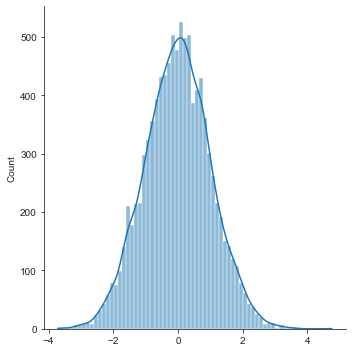

In [9]:
_ = sns.displot(x, kde=True) # kde = kernel density estimate

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with NumPy normal() method...

In [10]:
# increase #samples will make the mean closer to 0
np.mean(x)

-0.010639249916068615

In [11]:
np.std(x)

1.0155010722826505

...it is a <strong>standard normal distribution</strong> (a.k.a., standard Gaussian distribution). Normal distributions can be denoted with the *math callography* font as $\mathscr{N}(\mu,\sigma^2)$, thus the standard normal distribution can be denoted as $\mathscr{N}(0,1)$.  
(N.B.:$\sigma^2=\sigma$ in this case because $1^2=1$)

#### Real-world examples include:
- Probability of heads across $n$ tosses (PMF; $n=5$ earlier,$n=100$ below)
- Sum of di(c)e rolls (PMF)
- Height of adult women
- Height of adult men
- Education test scores, e.g., SAT

In [13]:
n_experiments = 10000
heads_count = [np.random.binomial(100, 0.5) for i in range (n_experiments)]
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

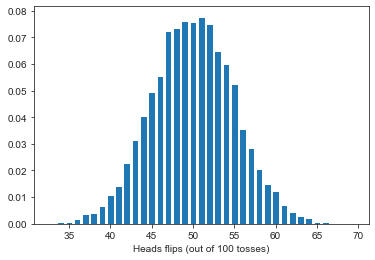

In [15]:
import matplotlib.pyplot as plt

plt.bar(heads, event_proba)
_ = plt.xlabel('Heads flips (out of 100 tosses)')

<hr>

#### The Central Limit Theorem
To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [16]:
x_sample = np.random.choice(x, size=10, replace=False) # no replacement = cannot sample the same data point twice
x_sample

array([ 0.81974006,  1.07220338,  1.99781847, -0.55102051, -0.52379505,
       -0.03444685, -0.25877082, -0.99358279,  0.32639292, -1.47496479])

In [17]:
# The mean of a sample isn't always going to be close to zero with such a small sample:
np.mean(x_sample)

0.037957400207626016

Let's define a function for generating <strong>sampling distributions</strong> of the mean of a given input distributions:

In [22]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

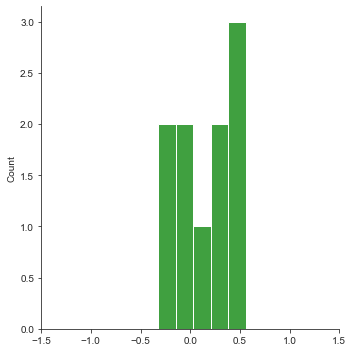

In [25]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green')
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed:

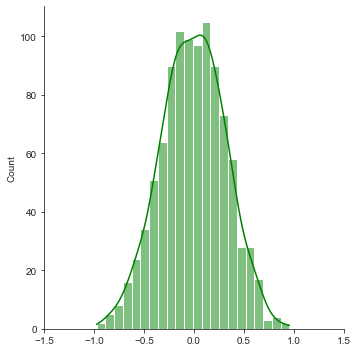

In [26]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the populatio mean:

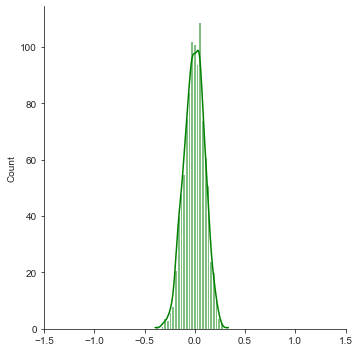

In [27]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

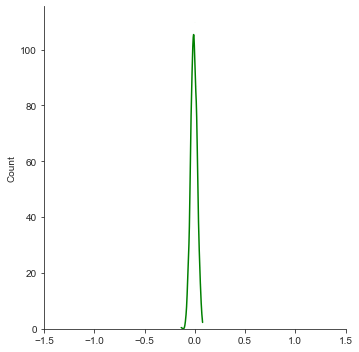

In [28]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

Sampling from skewed distribution:

In [30]:
import scipy.stats as st

s = st.skewnorm.rvs(10, size=10000)

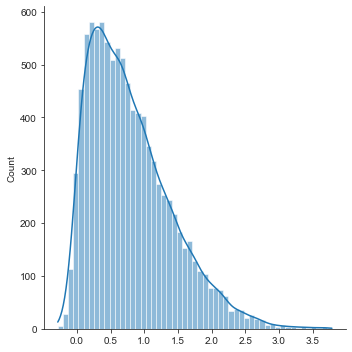

In [31]:
_ = sns.displot(s, kde=True)

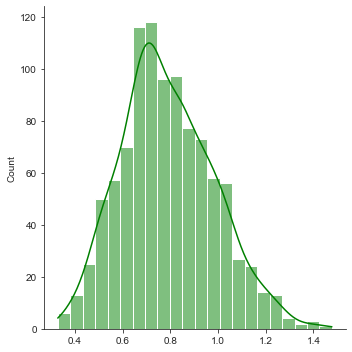

In [32]:
_ = sns.displot(sample_mean_calculator(s,10,1000), color='green', kde=True)

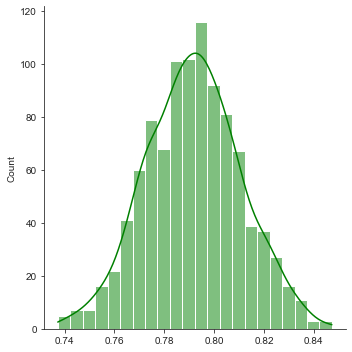

In [34]:
_ = sns.displot(sample_mean_calculator(s,1000,1000), color='green', kde=True)

Sampling from a multimodal distribution:

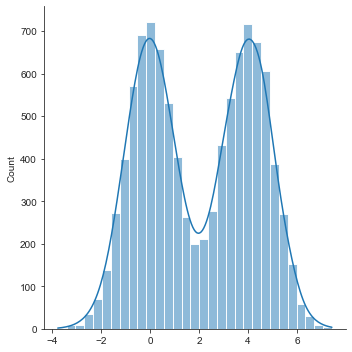

In [36]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc=4.0, size=5000)))

_ = sns.displot(m, kde=True)

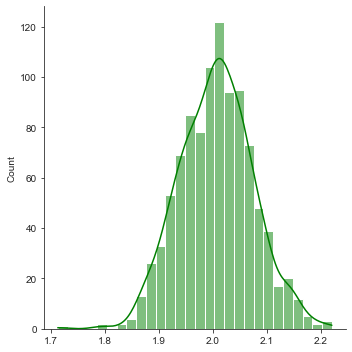

In [37]:
_ = sns.displot(sample_mean_calculator(m,1000,1000), color='green', kde=True)

Sampling from uniform:

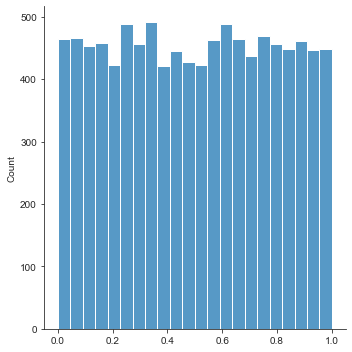

In [38]:
_ = sns.displot(u)

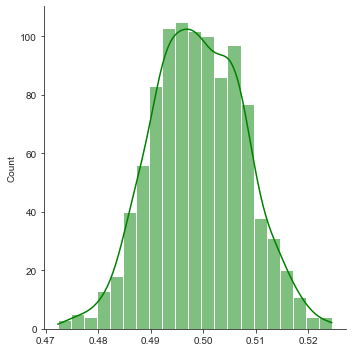

In [39]:
_ = sns.displot(sample_mean_calculator(u,1000,1000), color='green', kde=True)

<hr>

#### Log-Normal Distribution

The natural logarithm of the <strong>log-normal</strong> distribution is normally distributed:

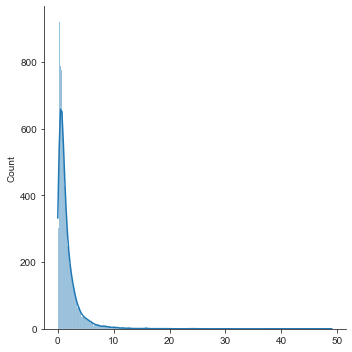

In [41]:
x = np.random.lognormal(size=10000) # defaults to standard normal mu=0, sigma=1

_ = sns.displot(x, kde=True)

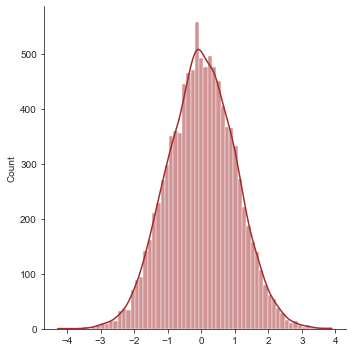

In [42]:
_ = sns.displot(np.log(x), color='brown', kde=True)

<hr>

#### Exponential Distribution

Relatively squished up against zero and then decreases exponentially toward higher values. Log-normal distribution, in contrast, could take negative values and both increases and decreases.

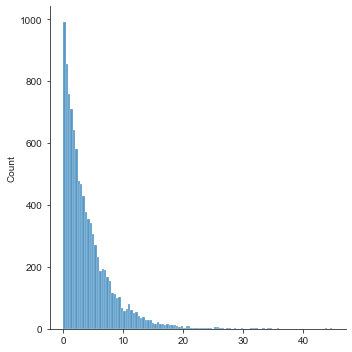

In [45]:
x = np.random.exponential(scale=4, size=10000) # "scale" parameter defaults to one

_ = sns.displot(x)

Its logarithm has a skewed distribution:

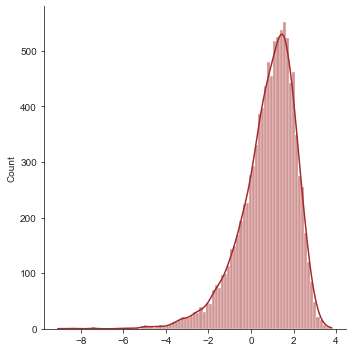

In [46]:
_ = sns.displot(np.log(x), color='brown', kde=True)